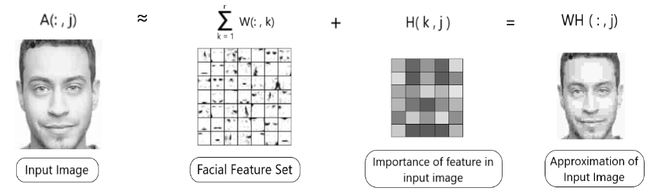
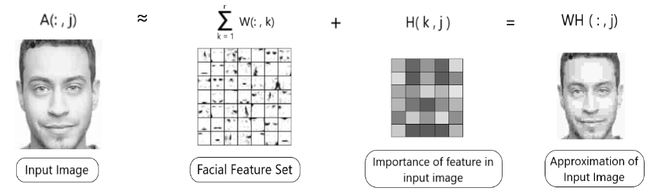

### Non-Negative Matrix Factorizations


### Project


You've been hired by a video streaming platform that specializes in kids content. The company would like to ensure that all content on the platform does not infringe on a copyright written material. The company has created an image database of copyrighted material, not only must you detect the same images you must detect similar images. Your  job is to come up with an image retrieval system to find the most similar image to each image in the provided dataset. Because your model is used for legal purposes it must be interpretable, this means it should be able to determine why the images are similar. As a result, you will use Non-Negative Matrix factorization since the factorized matrices can be interpreted as real images. You will use the [Anime Face Dataset](https://www.kaggle.com/datasets/splcher/animefacedataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) from kaggle.

Import the python libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:

import logging
import numpy as np
import pandas as pd
from numpy.random import RandomState
import matplotlib.pyplot as plt


from sklearn.decomposition import NMF


from os import listdir,getcwd
from os.path import isfile, join
from PIL import Image, ImageOps
import os 


Define helper function

In [3]:
def get_data_matrix(test=False,Length=100,Width=100,mypath="/kaggle/input/animefacedataset/images"):

    files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f[0] != '.']
    if mypath + '/.DS_Store' in files:
        files.remove(mypath + '/.DS_Store')
  
    if test:
        print("test data")
        files=files[9000:10000]
        
    else:
        print("training data")
        files=files[0:9000]
        
    print(len(files))
    X=np.zeros((len(files),Length*Width))
    for i,file in enumerate(files):
        img = Image.open(file).resize((Width, Length))
        img =  ImageOps.grayscale(img)

        I=np.array(img)
 
        X[i,:]=I.reshape(1,-1)
    return X

Plot images vectors

In [4]:
def reshape_row(x) :
    plt.imshow(x.reshape(Length,Width),cmap="gray")
    

This threshold function outputs an index if the input similar_distance is grater than or less than min_ and max_.

In [5]:
def threshold(similar_distance,max_=0.1,min_=0):
    dataset_index=np.where(np.logical_and(similar_distance>min_ ,similar_distance<max_))[0]
    query_index=similar_index[np.logical_and(similar_distance>min_ ,similar_distance<max_)]
    return dataset_index,query_index

Plot dataset images and query images, X and X_q are global variables.

In [6]:
def plot_data_query(dataset_index,query_index,N):
    for data_sample,query_sample in zip(dataset_index[0:N],query_index[0:N]):

        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        reshape_row(X[data_sample])
        plt.title("dataset sample {}".format(data_sample))
        plt.subplot(1,2,2)
        reshape_row(X_q[query_sample])
        plt.title("query sample match {}".format(query_sample))
        plt.show()

        print("-----------------------------------------------------")

### Background

In Non-Negative Matrix Factorization (NNMF) sometimes called non-negative matrix approximation, a $N x D$ matrix $\mathbf{X}$, where $N$ is the number of samples and $D$ is the dimension of features, contains all non-negative values. In NNMF we construct a non-negative  approximation of $\mathbf{X}$, $\mathbf{\hat{X}}$ such that $\mathbf{\hat{X}}$ is a product of two non-negative matrices $\mathbf{W}$ and $\mathbf{H}$, i.e:

$$\mathbf{\hat{X}}=\mathbf{WH}$$

where the $r$ rows of $\mathbf{H}$ are called the basis, and we are going to represent the matrix $\mathbf{X}$ in terms of this basis. 

Each row of $\mathbf{W}$, ${w}_i$ is called an encoding of the corresponding ${x}_i$ in $\mathbf{X}$, which represents "how much" of each basis in $\mathbf{H}$ is to represent ${x}_i$. ${\hat{x}_i}$ is thus a linear combination of the rows of $\mathbf{H}$.


## Applying Non-Negative Matrix Factorization

**Image retrieval** is used for searching and retrieving images from a large database of digital images. Here we would like to find identical or similar  animated faces  for copyright reasons.

Consider the matrix  𝐗
  where each row is a flattened  100×100
  image.

In [7]:
Length,Width=100,100
X=get_data_matrix(test=False,Length=100,Width=100,mypath="/kaggle/input/animefacedataset/images/")
X.shape

training data
9000


(9000, 10000)

In [8]:
n_components = 10

Initialize our NMF object and fit it to  𝐗
 :

In [9]:
nmf_estimator = NMF(n_components=n_components, tol=5e-3,max_iter=2000)
nmf_estimator.fit(X)  # original non- negative dataset

NMF(max_iter=2000, n_components=10, tol=0.005)

The **.components_methode** return the basis fund:

In [10]:
H = nmf_estimator.components_

We can reshape the obtained 10 basis into images, and they appear like faces in the dataset:

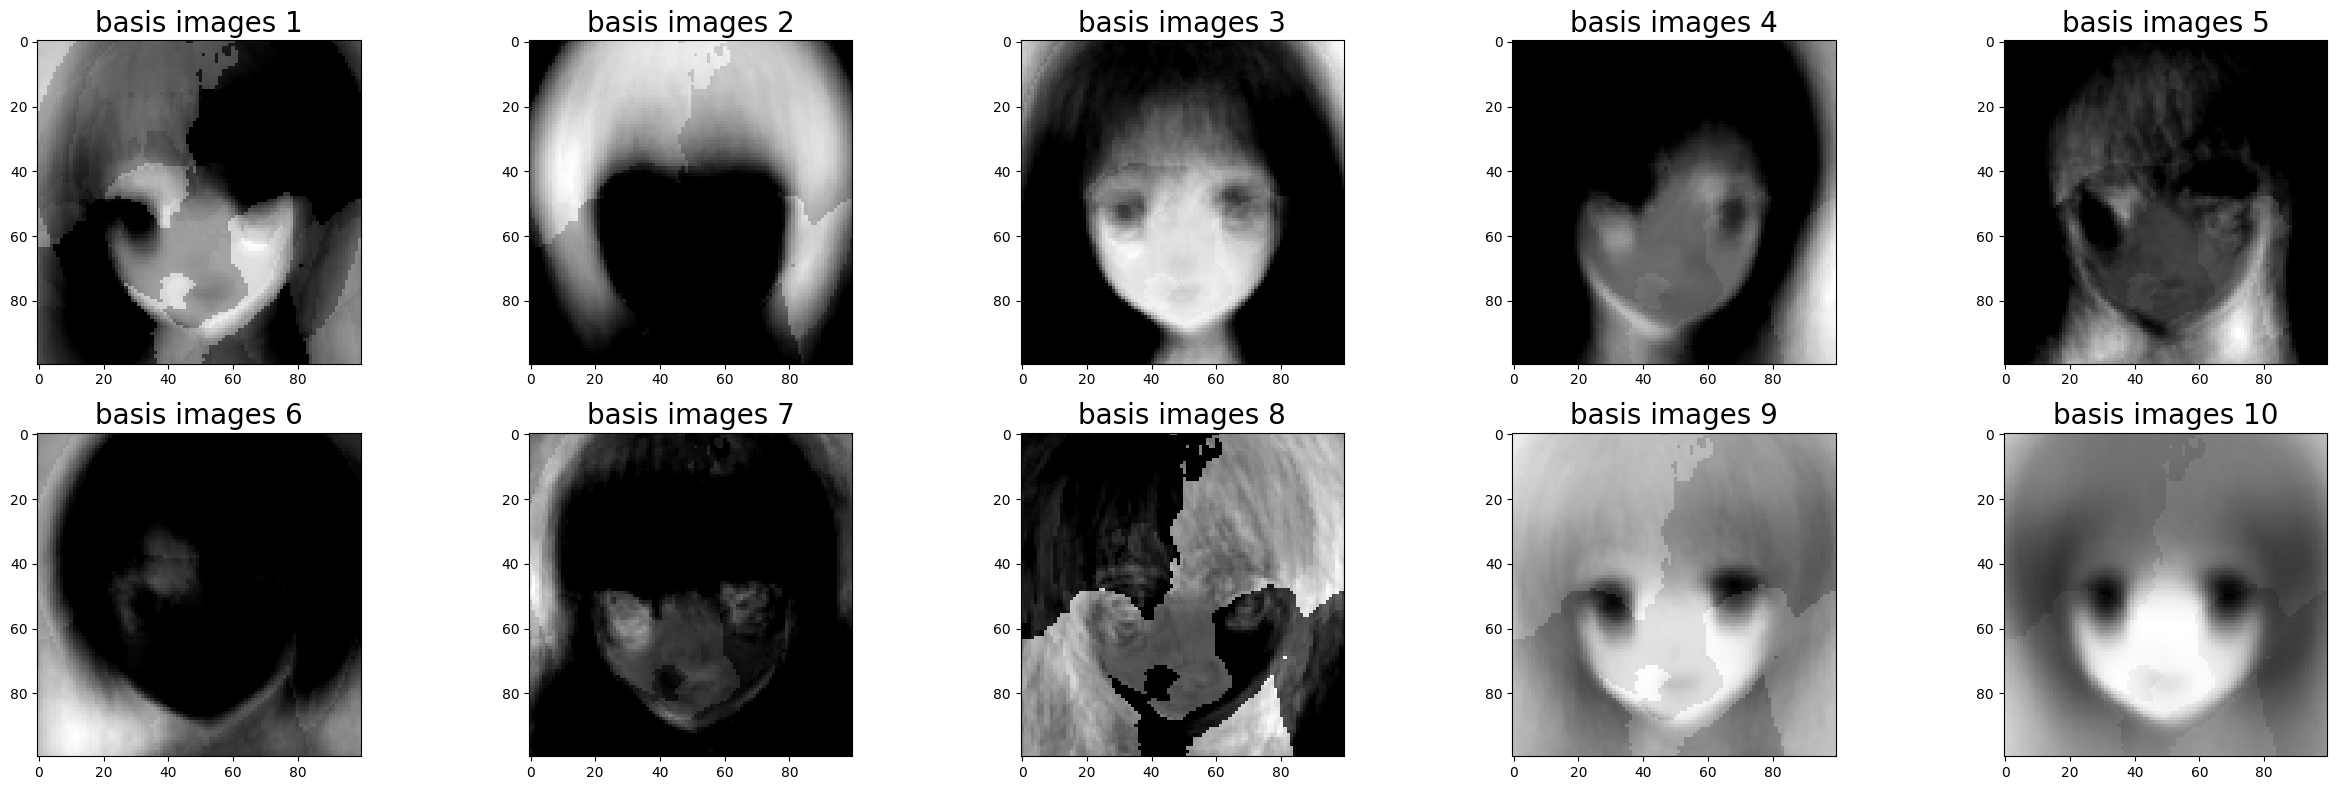

In [11]:
plt.figure(figsize=(25, 8))

for i,h in enumerate(H):   
    plt.subplot(2, 5, i+1)
    reshape_row(h)
    plt.title("basis images {}".format(str(i+1)), fontsize=20) 
    
plt.tight_layout()

We can obtain the encodings of all the images using the transform method of the fitted nmf_estimator:

In [12]:
W = nmf_estimator.transform(X)

For each of the 9000 images we have an encoding of dimension 10:

In [13]:
W.shape

(9000, 10)

The encoding tells you the projection of each image in  𝐗
  on a particular basis. Here we plot out the encoding magnitude for the  𝑖
 th image on each basis.

Text(0.5, 1.0, 'encodings for image 1 ')

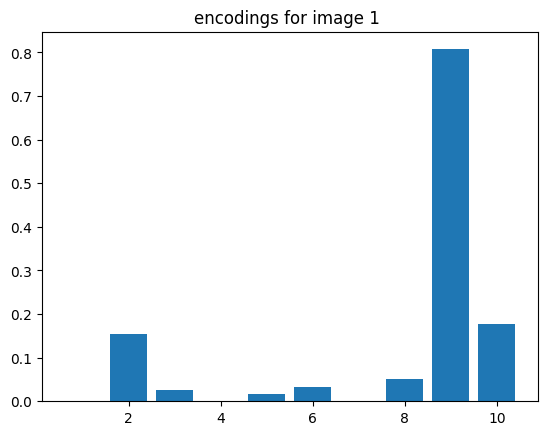

In [14]:
i=0
w=W[i,:]

plt.bar([n+1 for n in range(len(w))],w)
plt.title("encodings for image {} ".format (i+1))

We see that for image 1, the second encoding has the highest magnitude, thus we can plot out the basis associated with this encoding (i.e, the second basis) and see that it's very similar to the image. The 9th encoding has a small magnitude, we see the associated basis looks nothing like the image:

Text(0.5, 1.0, 'Dissimilar basis 9')

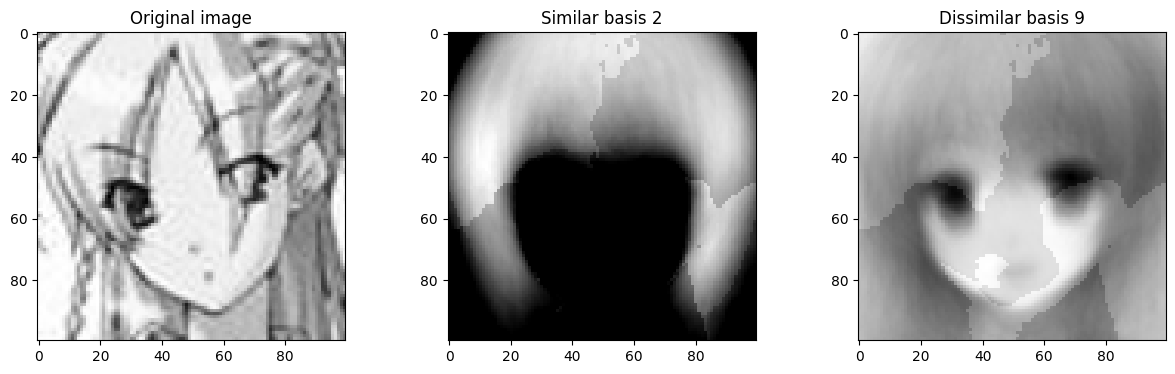

In [15]:
plt.figure(figsize=(15,4))

plt.subplot(131)
reshape_row(X[i,:])
plt.title("Original image")

plt.subplot(132)
reshape_row(H[1,:])
plt.title("Similar basis 2")

plt.subplot(133)
reshape_row(H[8,:])
plt.title("Dissimilar basis 9")

We can perform the inverse transform using the method inverse_transform to get  𝐗̂ 
 , the approximation of  𝐗
 :

In [16]:
Xhat=nmf_estimator.inverse_transform(W)


Each row of  𝐗̂ 
  corresponds to an image. We can reshape the row into an image and plot the approximations:age {i}")

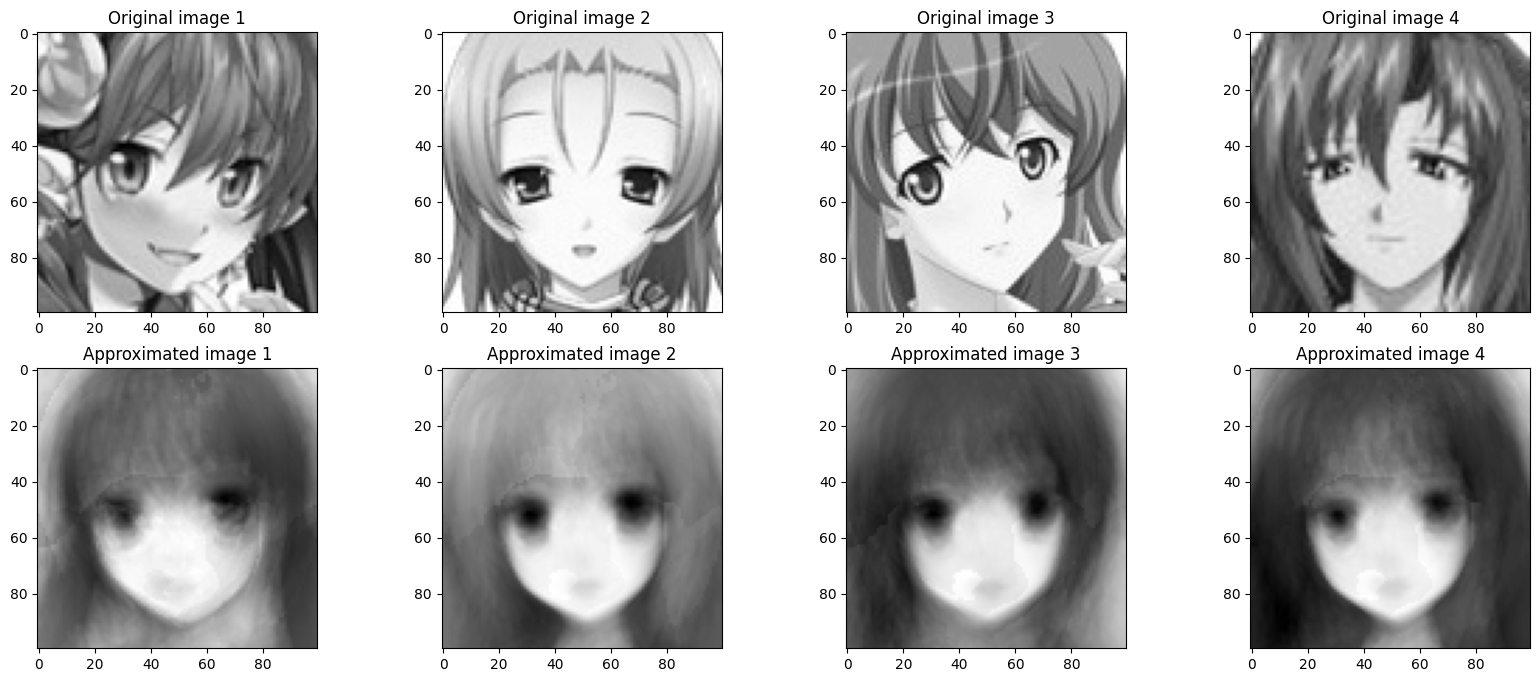

In [17]:
plt.figure(figsize=(20,8))

for i in range(1,5):
    plt.subplot(2,4,i)
    reshape_row(X[i])
    plt.title(f"Original image {i}")
    
    plt.subplot(2,4,i+4)
    reshape_row(Xhat[i])
    plt.title(f"Approximated image {i}")

We can verify that the scikit-learn's inverse_transform method essentially performs the following matrix operation:

In [18]:
Xhat_M=W@H
"""We see the results are identical quantitatively (for the first 10 grayscale values of first image):
"""
Xhat[0,:10], Xhat_M[0,:10]

(array([242.58266322, 241.82204008, 243.25696028, 241.42620305,
        239.19702234, 236.6650037 , 232.12776759, 229.56634395,
        228.91968961, 226.22259676]),
 array([242.58266322, 241.82204008, 243.25696028, 241.42620305,
        239.19702234, 236.6650037 , 232.12776759, 229.56634395,
        228.91968961, 226.22259676]))

and qualitatively or visually for the second to fifth image in the dataset:

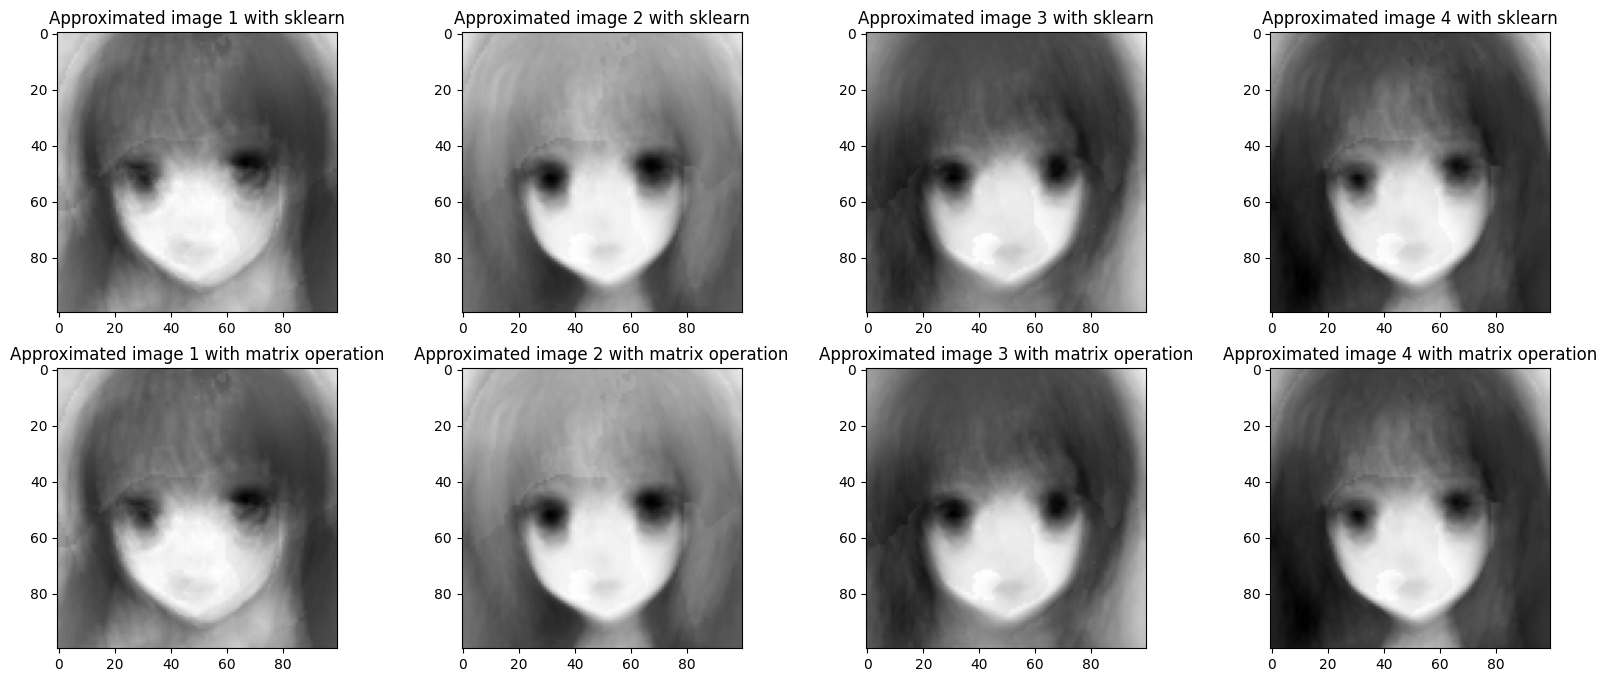

In [19]:
plt.figure(figsize=(20,8))

for i in range(1,5):
    plt.subplot(2,4,i)
    reshape_row(Xhat[i])
    plt.title(f"Approximated image {i} with sklearn")
    
    plt.subplot(2,4,i+4)
    reshape_row(Xhat_M[i])
    plt.title(f"Approximated image {i} with matrix operation")

We can reconstruct the image by adding one component multiplied by it's encoding at a time. This is shown in the following lines of code, as each successive component is added we see the image looks more and more like it's approximation:

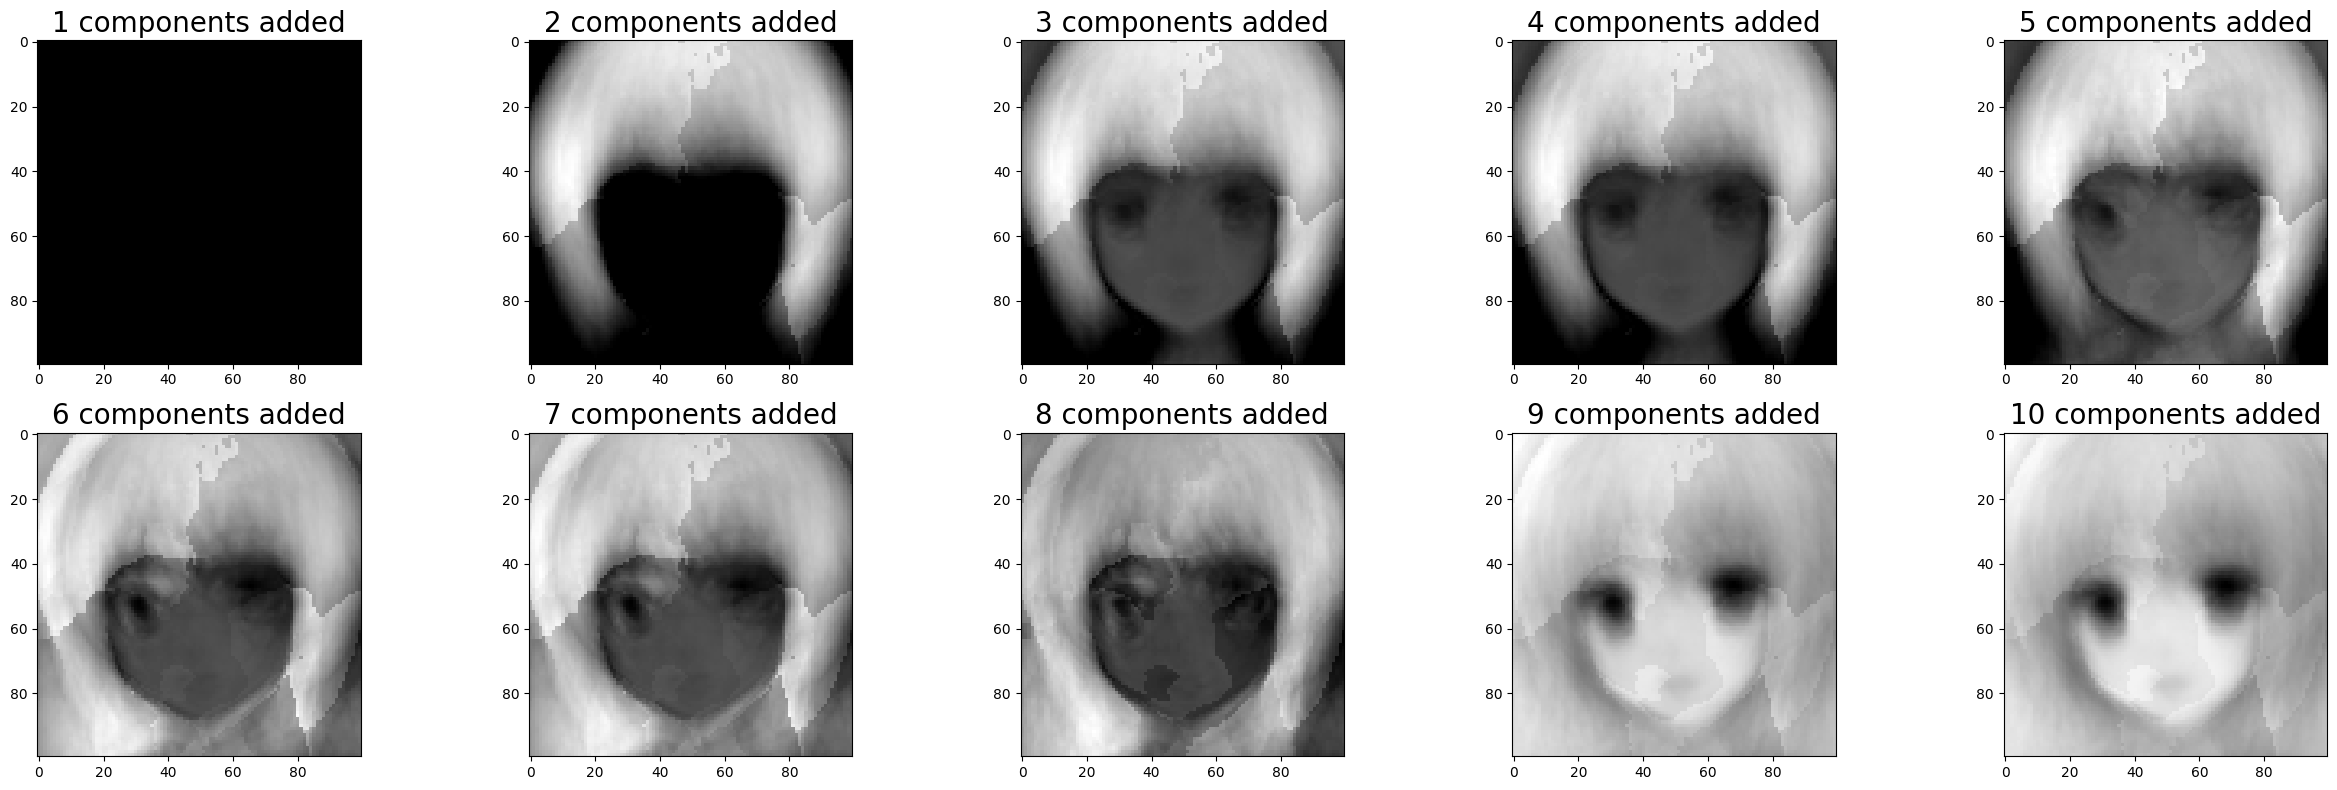

In [20]:
# initialize an image array with 10000 zeros which will be reshaped as 100x100  
image=np.zeros((1,10000))

plt.figure(figsize=(25,8))
for i, (w_, h) in enumerate(zip(w, H)):
    
    # w is the encoding vector of the first image in X
    # reconstruction of the image is a linear combination of H 
    plt.subplot(2,5,i+1)
    image += w_*h
    reshape_row(image)
    plt.title(f"{i+1} components added", fontsize=20)
plt.tight_layout()

## Image Retrieval system

An image retrieval system is a system used for browsing, searching and retrieving images from a large database of digital images. In this section we will create an image retrieval system to find similar cartoon characters for copyright infringement. 

We define the query dataset as the set of 1000 images. If these images are similar to the images in our original dataset, they may be considered as copyright infringement. We load the query dateset into```X_q``` where each row corresponds to a flattened $100\times 100$ image:

In [21]:
X_q=get_data_matrix(test=True,Length=100,Width=100,mypath="/kaggle/input/animefacedataset/images/")
X_q.shape

test data
1000


(1000, 10000)

The code in the next cell helps us retain much of the important information of the query images and reduces factors that make similar images appear differently such as noise, rotation and scale. In addition, the code results in a matrix W_q that requires less computation for calculating the distance metrics. As such we will use the code to find the similar images.

In [22]:
W_q=nmf_estimator.transform(X_q)
W_q.shape

(1000, 10)

We will use the function pairwise_distances from scikit-learn. This method takes either a vector array or a distance matrix, and returns a distance matrix. If the input is a vector array, the distances are computed.

In [23]:
from sklearn.metrics import pairwise_distances
D=pairwise_distances(W,W_q,metric='cosine')

D.shape

(9000, 1000)

For each sample in the dataset we find the query sample that has the smallest distance to it, which would be the most similar image. As each image in the original dataset corresponds to a row in the distance matrix, the column index with smallest value corresponds to the index of the closest image in the query dataset.

In [24]:
similar_index=np.argmin(D, axis=1)
#We also find the corresponding distance value
similar_distance=np.min(D, axis=1)

We plot out the distance values in a histogram; we see the values range from zero to approximately 0.06.

Text(0.5, 1.0, 'Distance values')

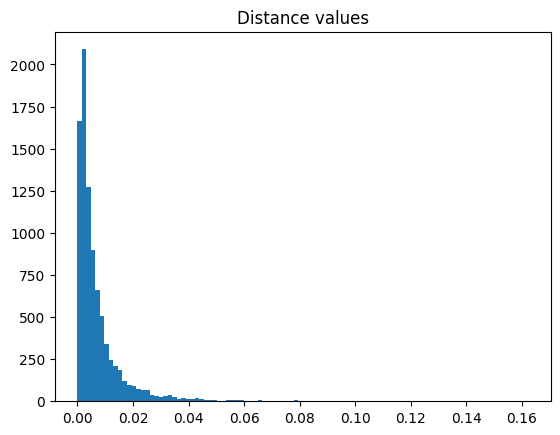

In [25]:
plt.hist(similar_distance,bins=100)
plt.title("Distance values")

In [26]:
dataset_index,query_index=threshold(similar_distance,max_=0.00001,min_=0)

In [27]:
dataset_index.shape, query_index.shape

((50,), (50,))

In [28]:
dataset_index[:10]

query_index[:10]

array([569, 290,  29,  70, 757, 419, 606, 277, 655, 375])

If we try a threshold of between  5.0𝑥10−3
  and  1.0𝑥10−2
  instead and plot out the first five samples, it is evident the many of the query images are very different from the original.

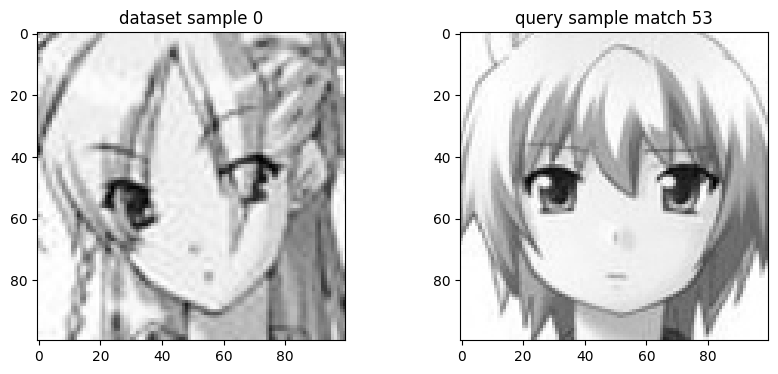

-----------------------------------------------------


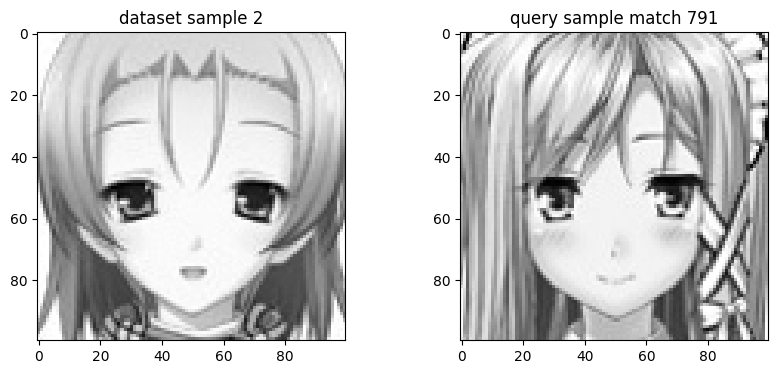

-----------------------------------------------------


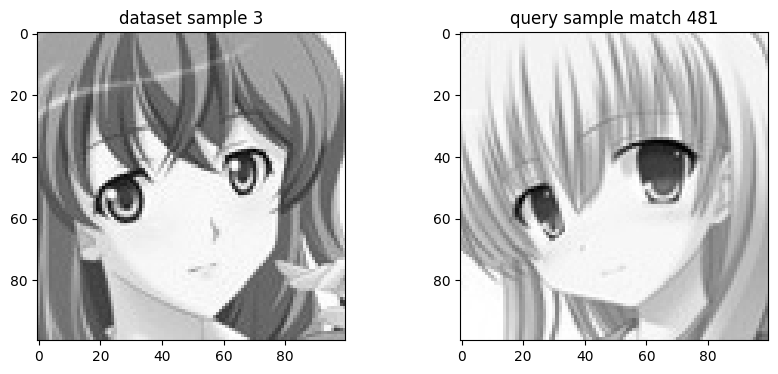

-----------------------------------------------------


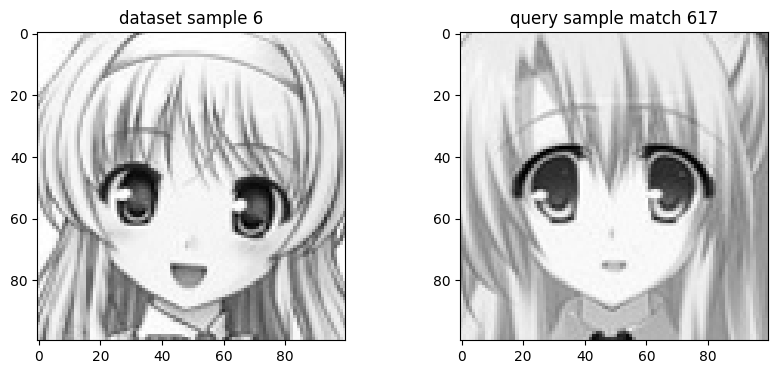

-----------------------------------------------------


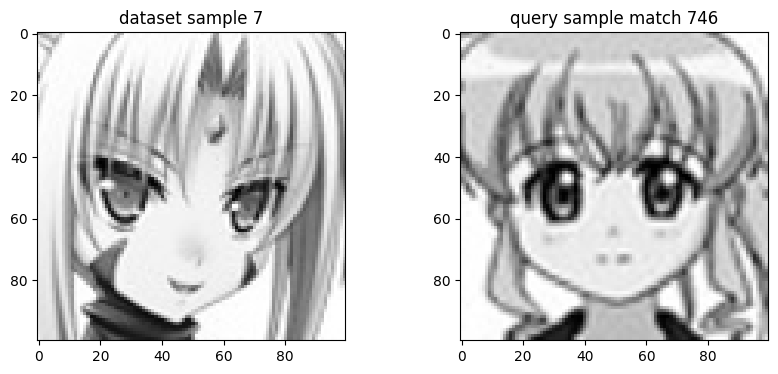

-----------------------------------------------------


In [29]:
dataset_index,query_index=threshold(similar_distance,max_=0.005,min_=0.00001)
plot_data_query(dataset_index,query_index,5)

### Thanks 